In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Task 1: Exploratory Data Analysis (EDA):

In [14]:
#load dataset:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [40]:
df.shape

(178, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [42]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [44]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

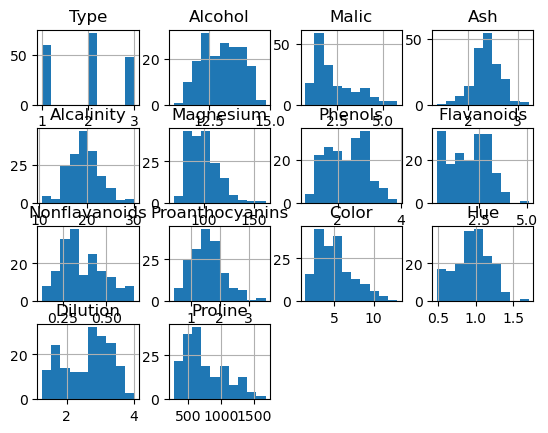

In [45]:
df.hist()

<Axes: >

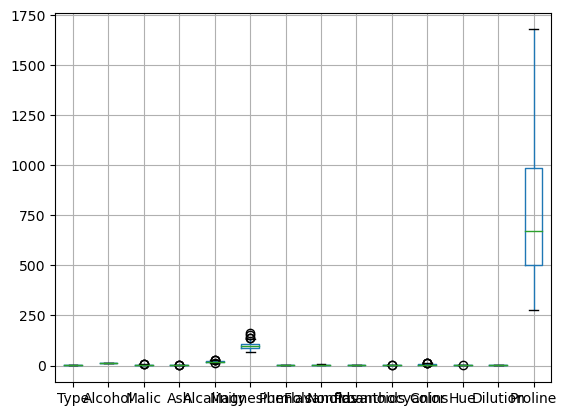

In [48]:
df.boxplot()

# Task 2: Dimensionality Reduction with PCA:

In [4]:
#normalization of dataset:
df_new =scale(df)

In [5]:
df_new

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
pca = PCA()
pca_values =pca.fit_transform(df_new)

In [15]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [20]:
pc = pd.DataFrame(pca_values)
pc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [9]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [10]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [21]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

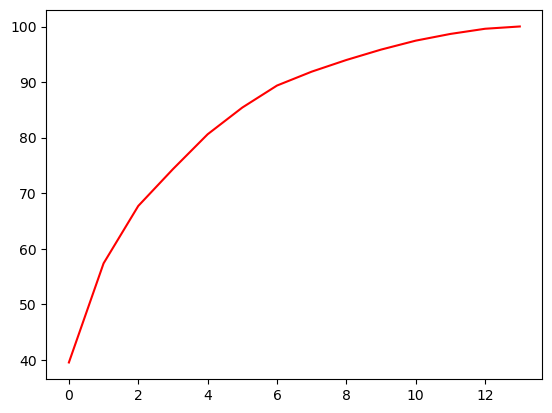

In [28]:
plt.plot(var1, color="red")

In [34]:
finalDf = pd.DataFrame(pca_values[:,0:6],columns=['pc1','pc2','pc3','pc4','pc5','pc6'])

In [35]:
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762
...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562


# Task 3: Clustering with Original Data:

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

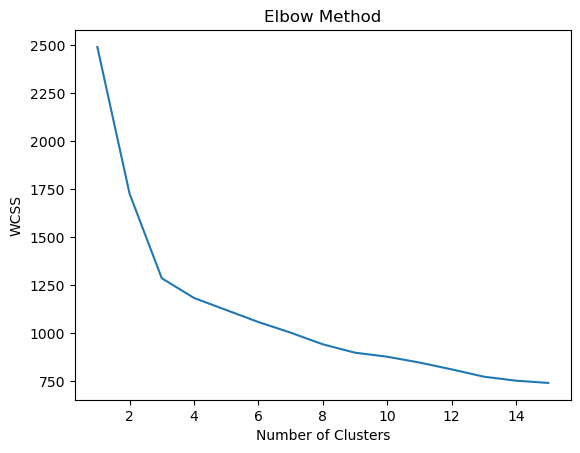

In [60]:
wcss =[]
for i in range(1,16):
    kmeans= KMeans(n_clusters=i,random_state=142)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
    
    # Plot after collecting all WCSS values
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#here we can seee that after 10 we have monimumal changes so that we can cluster number as 10

In [58]:
wcss

[2492.0000000000005,
 1727.228660932003,
 1285.6677396078076,
 1182.7236590041289,
 1119.8805966098512,
 1057.126649226505,
 1001.7654064414937,
 940.848261469245,
 897.1607455442391,
 876.1028141346517,
 845.8069889705378,
 810.097791460615,
 772.0324202842422,
 751.0345346722988,
 739.4322367553747]

In [62]:
clusters_new=KMeans(10, random_state=142)
kmeans_labels= clusters_new.fit(df_new)

C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [64]:
kmeans_labels

KMeans(n_clusters=10, random_state=142)

In [65]:
clusters_new.labels_

array([3, 0, 3, 3, 5, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       0, 0, 0, 5, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 9, 8, 9, 9, 2, 8, 2,
       9, 9, 6, 6, 6, 5, 9, 5, 2, 9, 9, 6, 6, 2, 9, 9, 8, 7, 2, 9, 8, 8,
       8, 8, 8, 8, 8, 2, 2, 6, 6, 9, 2, 2, 9, 9, 2, 9, 9, 8, 9, 8, 9, 2,
       2, 9, 8, 8, 8, 8, 9, 9, 9, 9, 2, 5, 8, 2, 2, 2, 2, 8, 8, 8, 6, 1,
       1, 1, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 4, 1, 1, 1, 1, 4,
       4, 7, 4, 7, 4, 4, 7, 7, 7, 7, 4, 7, 1, 4, 1, 1, 7, 4, 4, 7, 7, 1,
       4, 7])

In [71]:
clusters=pd.DataFrame(clusters_new.labels_)
clusters

,0
0,3
1,0
2,3
3,3
4,5
...,...
173,7
174,7
175,1
176,4


In [68]:
print(len(df_new))  # Length of dataframe
print(len(clusters_new.labels_))  # Length of cluster labels

178
178


# Task 4: Clustering with PCA Data:

C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

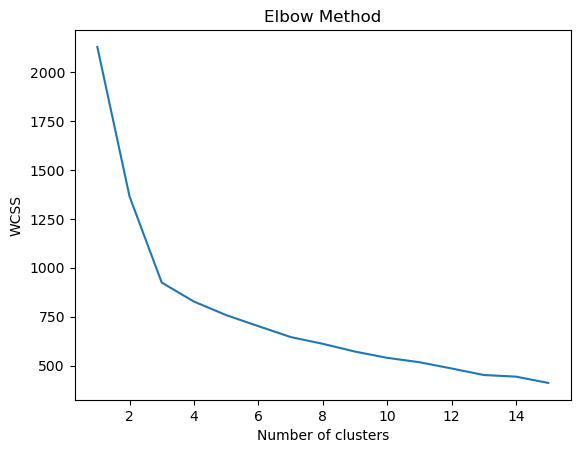

In [78]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss1 = []

# Loop to calculate WCSS for each number of clusters
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=142)
    kmeans.fit(finalDf)
    wcss1.append(kmeans.inertia_)

# Now plot the WCSS values
plt.plot(range(1, 16), wcss1)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [79]:
wcss1

[2128.3989008251024,
 1364.5928736574133,
 924.201690843373,
 827.1786915690948,
 758.0181770693648,
 701.5713980882693,
 646.0431332953258,
 611.3841632894196,
 571.6340827693853,
 539.6942644898975,
 517.2616078128367,
 485.2778246366845,
 451.8976491016462,
 443.493241411809,
 411.4856017449736]

In [81]:
clusters_new=KMeans(8, random_state=142)
kmeans_labels= clusters_new.fit(finalDf)

C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [82]:
clusters_new.labels_

array([3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 6,
       0, 0, 0, 6, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 5, 1, 2, 2, 5, 5,
       2, 2, 5, 7, 1, 6, 5, 6, 6, 2, 2, 5, 7, 6, 2, 2, 5, 1, 6, 2, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 7, 7, 2, 2, 6, 2, 2, 6, 2, 2, 5, 2, 5, 2, 6,
       6, 2, 5, 5, 5, 5, 2, 5, 1, 2, 6, 6, 6, 6, 6, 2, 6, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4])

# Task 5: Comparison and Analysis:

In [83]:
'''The PCA-transformed data provides more compact clusters (lower WCSS), and clustering becomes computationally faster with reduced dimensions. However, it comes at the cost of losing the original feature interpretability. On the other hand, clustering on the original dataset provides more interpretable clusters but might suffer from issues like overfitting or noise in high-dimensional data.

In practice, a good strategy might be to apply PCA if the dataset has many features, to improve the clustering performance, and then inspect the clusters to see if they still make sense in terms of the original features.'''

'The PCA-transformed data provides more compact clusters (lower WCSS), and clustering becomes computationally faster with reduced dimensions. However, it comes at the cost of losing the original feature interpretability. On the other hand, clustering on the original dataset provides more interpretable clusters but might suffer from issues like overfitting or noise in high-dimensional data.\n\nIn practice, a good strategy might be to apply PCA if the dataset has many features, to improve the clustering performance, and then inspect the clusters to see if they still make sense in terms of the original features.'

# Task 6: Conclusion and Insights

In [85]:
'''Use PCA when working with high-dimensional, noisy, or redundant data where interpretability is not the main focus and computational efficiency is important.'''

'Use PCA when working with high-dimensional, noisy, or redundant data where interpretability is not the main focus and computational efficiency is important.'